# Geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [2]:
!ls ../dados/tse/ibge/*.shp

../dados/tse/ibge/33MUE250GC_SIR.shp
../dados/tse/ibge/35MUE250GC_SIR.shp
../dados/tse/ibge/T_LM_MUNICIPIOS_2010Polygon.shp


In [3]:
RJ = gpd.read_file("../dados/tse/ibge/33MUE250GC_SIR.shp")
SP = gpd.read_file("../dados/tse/ibge/35MUE250GC_SIR.shp")
RJ.head()
SP.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1727,3500105,ADAMANTINA,"POLYGON ((-51.09093 -21.47214, -51.09062 -21.4..."
1,1728,3500204,ADOLFO,"POLYGON ((-49.69668 -21.34430, -49.69641 -21.3..."
2,1729,3500303,AGUAÍ,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,1730,3500402,ÁGUAS DA PRATA,"POLYGON ((-46.73069 -21.94470, -46.73065 -21.9..."
4,1731,3500501,ÁGUAS DE LINDÓIA,"POLYGON ((-46.63500 -22.45781, -46.63432 -22.4..."


In [4]:
brasil=pd.concat([RJ,SP])


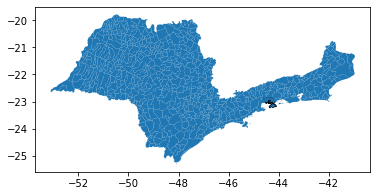

In [5]:
ax = brasil[brasil.NM_MUNICIP == 'ANGRA DOS REIS'].plot(color='white', edgecolor='black')
brasil.plot(ax=ax)
plt.show()

In [6]:
angra=RJ[RJ.NM_MUNICIP == 'ANGRA DOS REIS']

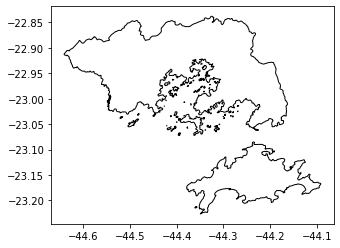

In [7]:
angra.plot(color='white', edgecolor='black')

In [8]:
RJ.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


Text(0.5, 1, 'Rio de Janeiro')

(-45.0858606521148, -40.7619784166046, -23.49921828794555, -20.63291913697854)

(-45.0858606521148, -40.7619784166046, -23.49921828794555, -20.63291913697854)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


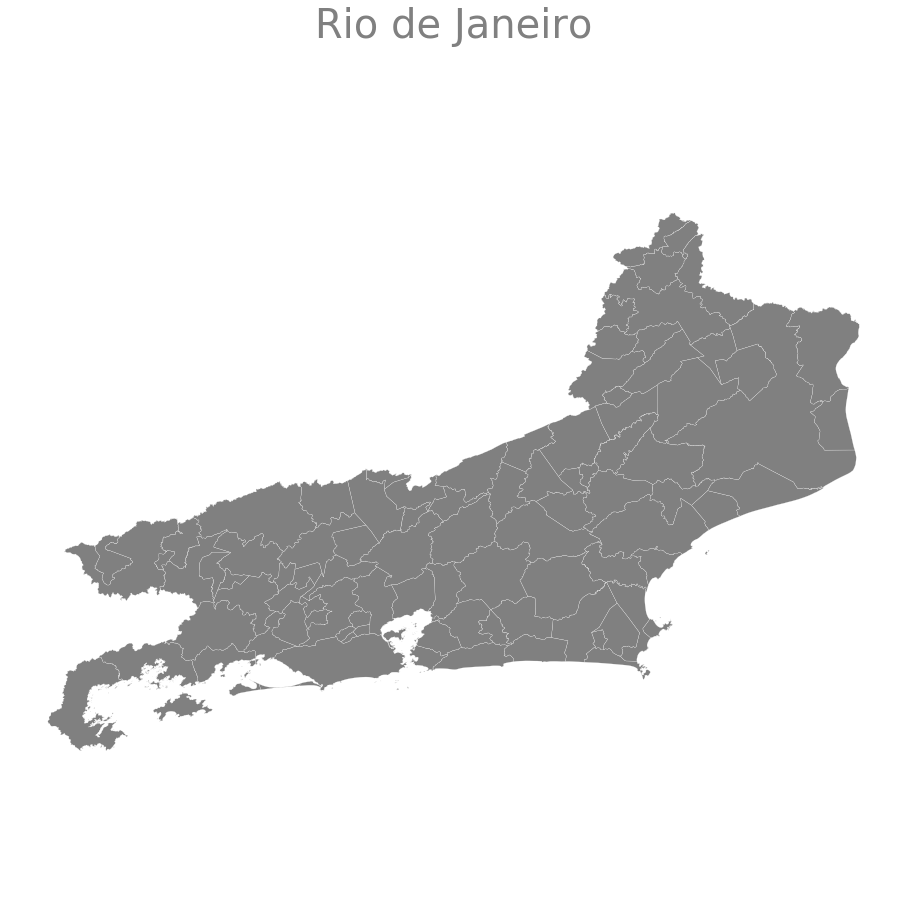

In [9]:
fig, ax = plt.subplots(figsize=(16,16)) # 1
RJ.plot(ax=ax, color="grey", edgecolor="white", linewidth=0.2) # 2
plt.title("Rio de Janeiro", fontsize=40, fontname="Palatino Linotype", color="grey") # 3
ax.axis('off') # 4
plt.axis("equal") # 5
plt.show() # 6

In [10]:
idhm=pd.read_csv("../dados/tse/ibge/idhm_municipios2018.csv")

In [11]:
#idhm.head()
idhm.columns


Index(['Unnamed: 0', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO',
       'DS_CARGO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO',
       'DS_DETALHE_SITUACAO_CAND', 'SG_PARTIDO', 'QT_VOTOS_NOMINAIS', 'CODIGO',
       'IDHM_2010', 'IDHM_RENDA_2010', 'IDHM_LONGEV_2010', 'IDHM_EDUC_2010'],
      dtype='object')

In [12]:
idhm.drop(columns=['Unnamed: 0', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
                    'NM_MUNICIPIO', 'DS_CARGO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
                    'NM_SOCIAL_CANDIDATO', 'DS_DETALHE_SITUACAO_CAND', 'SG_PARTIDO',
                   'QT_VOTOS_NOMINAIS'], inplace=True)

In [13]:
idhm.shape
idhm.drop_duplicates(keep="first", inplace=True)
#idhm.head()
#idhm.shape
idhm.info()

(3465603, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5484 entries, 0 to 3465477
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CODIGO            5484 non-null   int64 
 1   IDHM_2010         5484 non-null   object
 2   IDHM_RENDA_2010   5484 non-null   object
 3   IDHM_LONGEV_2010  5484 non-null   object
 4   IDHM_EDUC_2010    5484 non-null   object
dtypes: int64(1), object(4)
memory usage: 257.1+ KB


In [14]:
#df.astype({'col1': 'int32'}).dtypes
RJ=RJ.astype({"CD_GEOCODM":"int64"})
RJ.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          92 non-null     int64   
 1   CD_GEOCODM  92 non-null     int64   
 2   NM_MUNICIP  92 non-null     object  
 3   geometry    92 non-null     geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 3.0+ KB


In [15]:
idhm.rename(columns={"CODIGO":"CD_GEOCODM"}, inplace=True)
idhm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5484 entries, 0 to 3465477
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CD_GEOCODM        5484 non-null   int64 
 1   IDHM_2010         5484 non-null   object
 2   IDHM_RENDA_2010   5484 non-null   object
 3   IDHM_LONGEV_2010  5484 non-null   object
 4   IDHM_EDUC_2010    5484 non-null   object
dtypes: int64(1), object(4)
memory usage: 257.1+ KB


In [16]:
#pd.merge(adf, bdf,how='left', on='x1')
RJ=pd.merge(RJ, idhm, how="left", on="CD_GEOCODM")
RJ.head()
RJ.shape


,ID,CD_GEOCODM,NM_MUNICIP,geometry,IDHM_2010,IDHM_RENDA_2010,IDHM_LONGEV_2010,IDHM_EDUC_2010
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...","0,724","0,74","0,846","0,605"
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6...","0,692","0,67","0,785","0,631"
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...","0,718","0,714","0,839","0,617"
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...","0,684","0,686","0,823","0,566"
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...","0,728","0,75","0,824","0,624"


(92, 8)

Text(0.5, 1, 'Rio de Janeiro - IDHM Municípios')

(-45.085860652114796,
 -40.7619784166046,
 -23.49921828794555,
 -20.63291913697854)

(-45.085860652114796,
 -40.7619784166046,
 -23.49921828794555,
 -20.63291913697854)

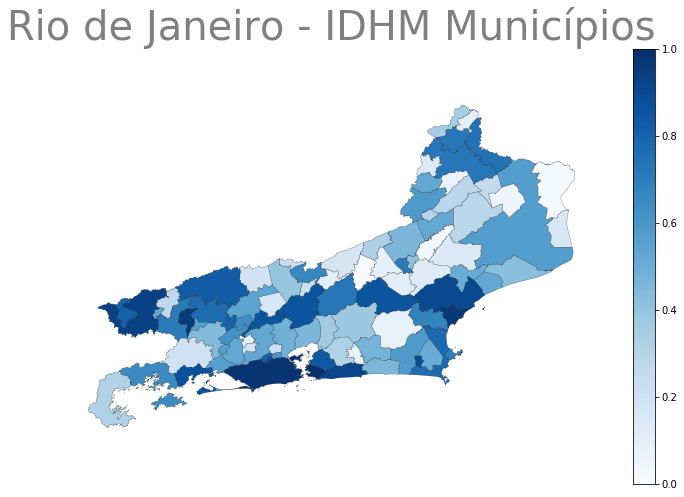

In [17]:
indicador="IDHM_2010"
vmin=0
vmax=1

fig, ax = plt.subplots(figsize=(12,8)) # 1
RJ.plot(ax=ax, column=indicador, cmap="Blues", edgecolor="black", linewidth=0.2) # 2
#RJ.plot(ax=ax, column=indicador, cmap="Blues",color="grey", edgecolor=0.8, linewidth=0.2) # 2
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmax, vmax=vmin))
sm._A = []
cbar = fig.colorbar(sm)
plt.title("Rio de Janeiro - IDHM Municípios", fontsize=40, fontname="Palatino Linotype", color="grey") # 3
ax.axis('off') # 4
plt.axis("equal") # 5
plt.show() # 6

In [ ]:
#frame.sort_values(by='b')
RJ.columns
RJ.sort_values(by="IDHM_2010", ascending=False)

In [ ]:
RJ[RJ["NM_MUNICIP"]=="RIO DE JANEIRO"]
RJ[RJ["NM_MUNICIP"]=="NITERÓI"]